In [2]:
import numpy as np
import pandas as pd

R=8.314
Ea=29775
k0=27038

# Set the number of samples to generate
num_samples = 1000
np.random.seed(42)  # For reproducibility
# Generate random data within the specified ranges

data = {
    'Flow_Rate_EA (L/s)': np.random.uniform(0.001, 10, num_samples),
    'Flow_Rate_NaOH (L/s)': np.random.uniform(0.001, 10, num_samples),
    'Conc_EA (Mol/L)': np.random.uniform(0.01, 1, num_samples),
    'Conc_NaOH (Mol/L)': np.random.uniform(0.01, 1, num_samples),
    'Reactor_Vol (L)': np.random.uniform(0.5, 500, num_samples),
    'Temp (Kelvin)': np.random.uniform(25, 60, num_samples) + 273.15
}
# Create a DataFrame
random_data_df = pd.DataFrame(data)

# Display the first few rows of the generated data
random_data_df

,Flow_Rate_EA (L/s),Flow_Rate_NaOH (L/s),Conc_EA (Mol/L),Conc_NaOH (Mol/L),Reactor_Vol (L),Temp (Kelvin)
0,3.746027,1.852144,0.269089,0.675976,286.211941,311.927243
1,9.507192,5.419468,0.254509,0.798715,402.813448,314.720248
2,7.320207,8.729585,0.907192,0.257963,380.200384,328.059159
3,5.986986,7.322517,0.257051,0.628625,77.373002,310.050154
4,1.561030,8.065805,0.279230,0.576029,75.050110,328.587739
...,...,...,...,...,...,...
995,0.916729,6.569895,0.866643,0.447686,448.749961,322.105238
996,9.173218,9.566190,0.165700,0.341057,60.130815,315.762715
997,1.369049,0.690511,0.316690,0.400627,164.257498,324.930210
998,9.502423,0.571490,0.297145,0.534641,407.964818,315.135172


In [3]:
def calculate_reaction_constant(T):
    return k0 * np.exp(-Ea / (R * T))
k = calculate_reaction_constant(random_data_df['Temp (Kelvin)'])
k.head()

0    0.279087
1    0.309022
2    0.490831
3    0.260347
4    0.499526
Name: Temp (Kelvin), dtype: float64

In [4]:

residence_time = random_data_df['Reactor_Vol (L)'] / (random_data_df['Flow_Rate_EA (L/s)'] + random_data_df['Flow_Rate_NaOH (L/s)'])
residence_time.head()

M=random_data_df['Conc_NaOH (Mol/L)']/random_data_df['Conc_EA (Mol/L)']
M.head()

0    2.512094
1    3.138257
2    0.284353
3    2.445530
4    2.062916
dtype: float64

In [5]:
const_value = np.exp(k * (M - 1) * random_data_df['Conc_EA (Mol/L)'] * residence_time)
X_A=M*(const_value-1)/(M*const_value-1)
random_data_df['Conversion'] = X_A
random_data_df['Conversion'] = random_data_df['Conversion'].clip(upper=1.0)
random_data_df['Conversion'] = random_data_df['Conversion'].clip(lower=0.0)
# Display the first few rows of the generated data with conversion  

# Save the DataFrame to a CSV file  
random_data_df.to_csv('PFR data set.csv', index=False)
random_data_df

,Flow_Rate_EA (L/s),Flow_Rate_NaOH (L/s),Conc_EA (Mol/L),Conc_NaOH (Mol/L),Reactor_Vol (L),Temp (Kelvin),Conversion
0,3.746027,1.852144,0.269089,0.675976,286.211941,311.927243,0.998186
1,9.507192,5.419468,0.254509,0.798715,402.813448,314.720248,0.992690
2,7.320207,8.729585,0.907192,0.257963,380.200384,328.059159,0.284246
3,5.986986,7.322517,0.257051,0.628625,77.373002,310.050154,0.560829
4,1.561030,8.065805,0.279230,0.576029,75.050110,328.587739,0.808589
...,...,...,...,...,...,...,...
995,0.916729,6.569895,0.866643,0.447686,448.749961,322.105238,0.516564
996,9.173218,9.566190,0.165700,0.341057,60.130815,315.762715,0.277889
997,1.369049,0.690511,0.316690,0.400627,164.257498,324.930210,0.988654
998,9.502423,0.571490,0.297145,0.534641,407.964818,315.135172,0.977649


#### **Data cleaning**

In [6]:
# Data Cleaning Step
# Handle missing values
random_data_df.dropna(inplace=True)

# Remove outliers using Z-score (optional, based on your dataset)
from scipy.stats import zscore
z_scores = random_data_df.apply(zscore)
random_data_df = random_data_df[(z_scores < 3).all(axis=1)]  # Keep rows with Z-scores < 3

# Reset index after cleaning
random_data_df.reset_index(drop=True, inplace=True)

# Display cleaned data summary
print("Cleaned Data Summary:")
random_data_df.describe()

Cleaned Data Summary:


,Flow_Rate_EA (L/s),Flow_Rate_NaOH (L/s),Conc_EA (Mol/L),Conc_NaOH (Mol/L),Reactor_Vol (L),Temp (Kelvin),Conversion
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,4.903075,5.070666,0.507382,0.495471,247.305609,315.596257,0.619562
std,2.921081,2.921607,0.287767,0.283624,143.261567,10.121818,0.319577
min,0.047316,0.033179,0.010012,0.010647,0.515344,298.366434,0.001414
25%,2.360497,2.411502,0.268737,0.249482,122.864516,306.878300,0.335270
50%,4.968577,5.187820,0.505608,0.489436,247.551749,315.314099,0.670041
75%,7.443452,7.604890,0.761512,0.740165,370.126729,324.044812,0.942126
max,9.997177,9.994138,0.997843,0.999562,498.875820,333.127261,1.000000


#### **Exploratory Data Analysis (EDA)**

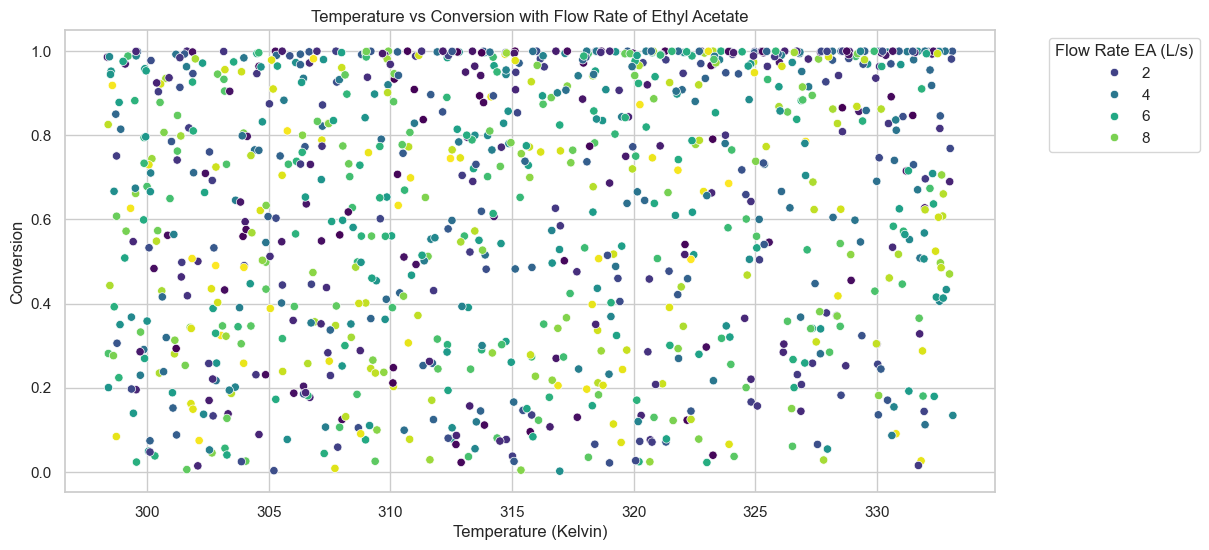

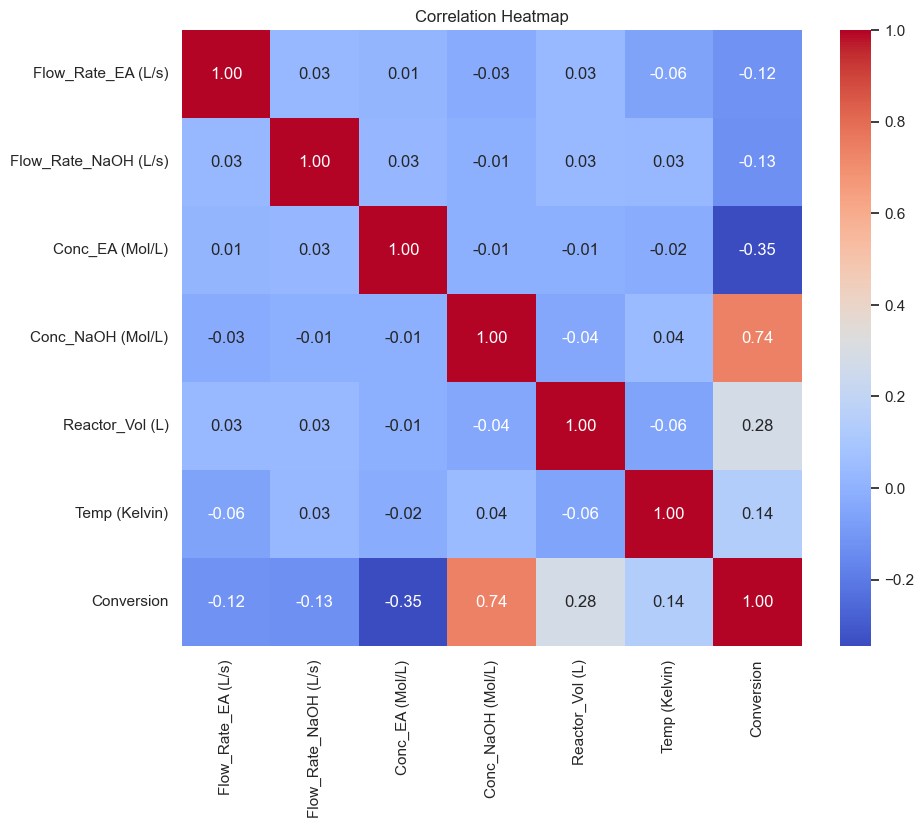

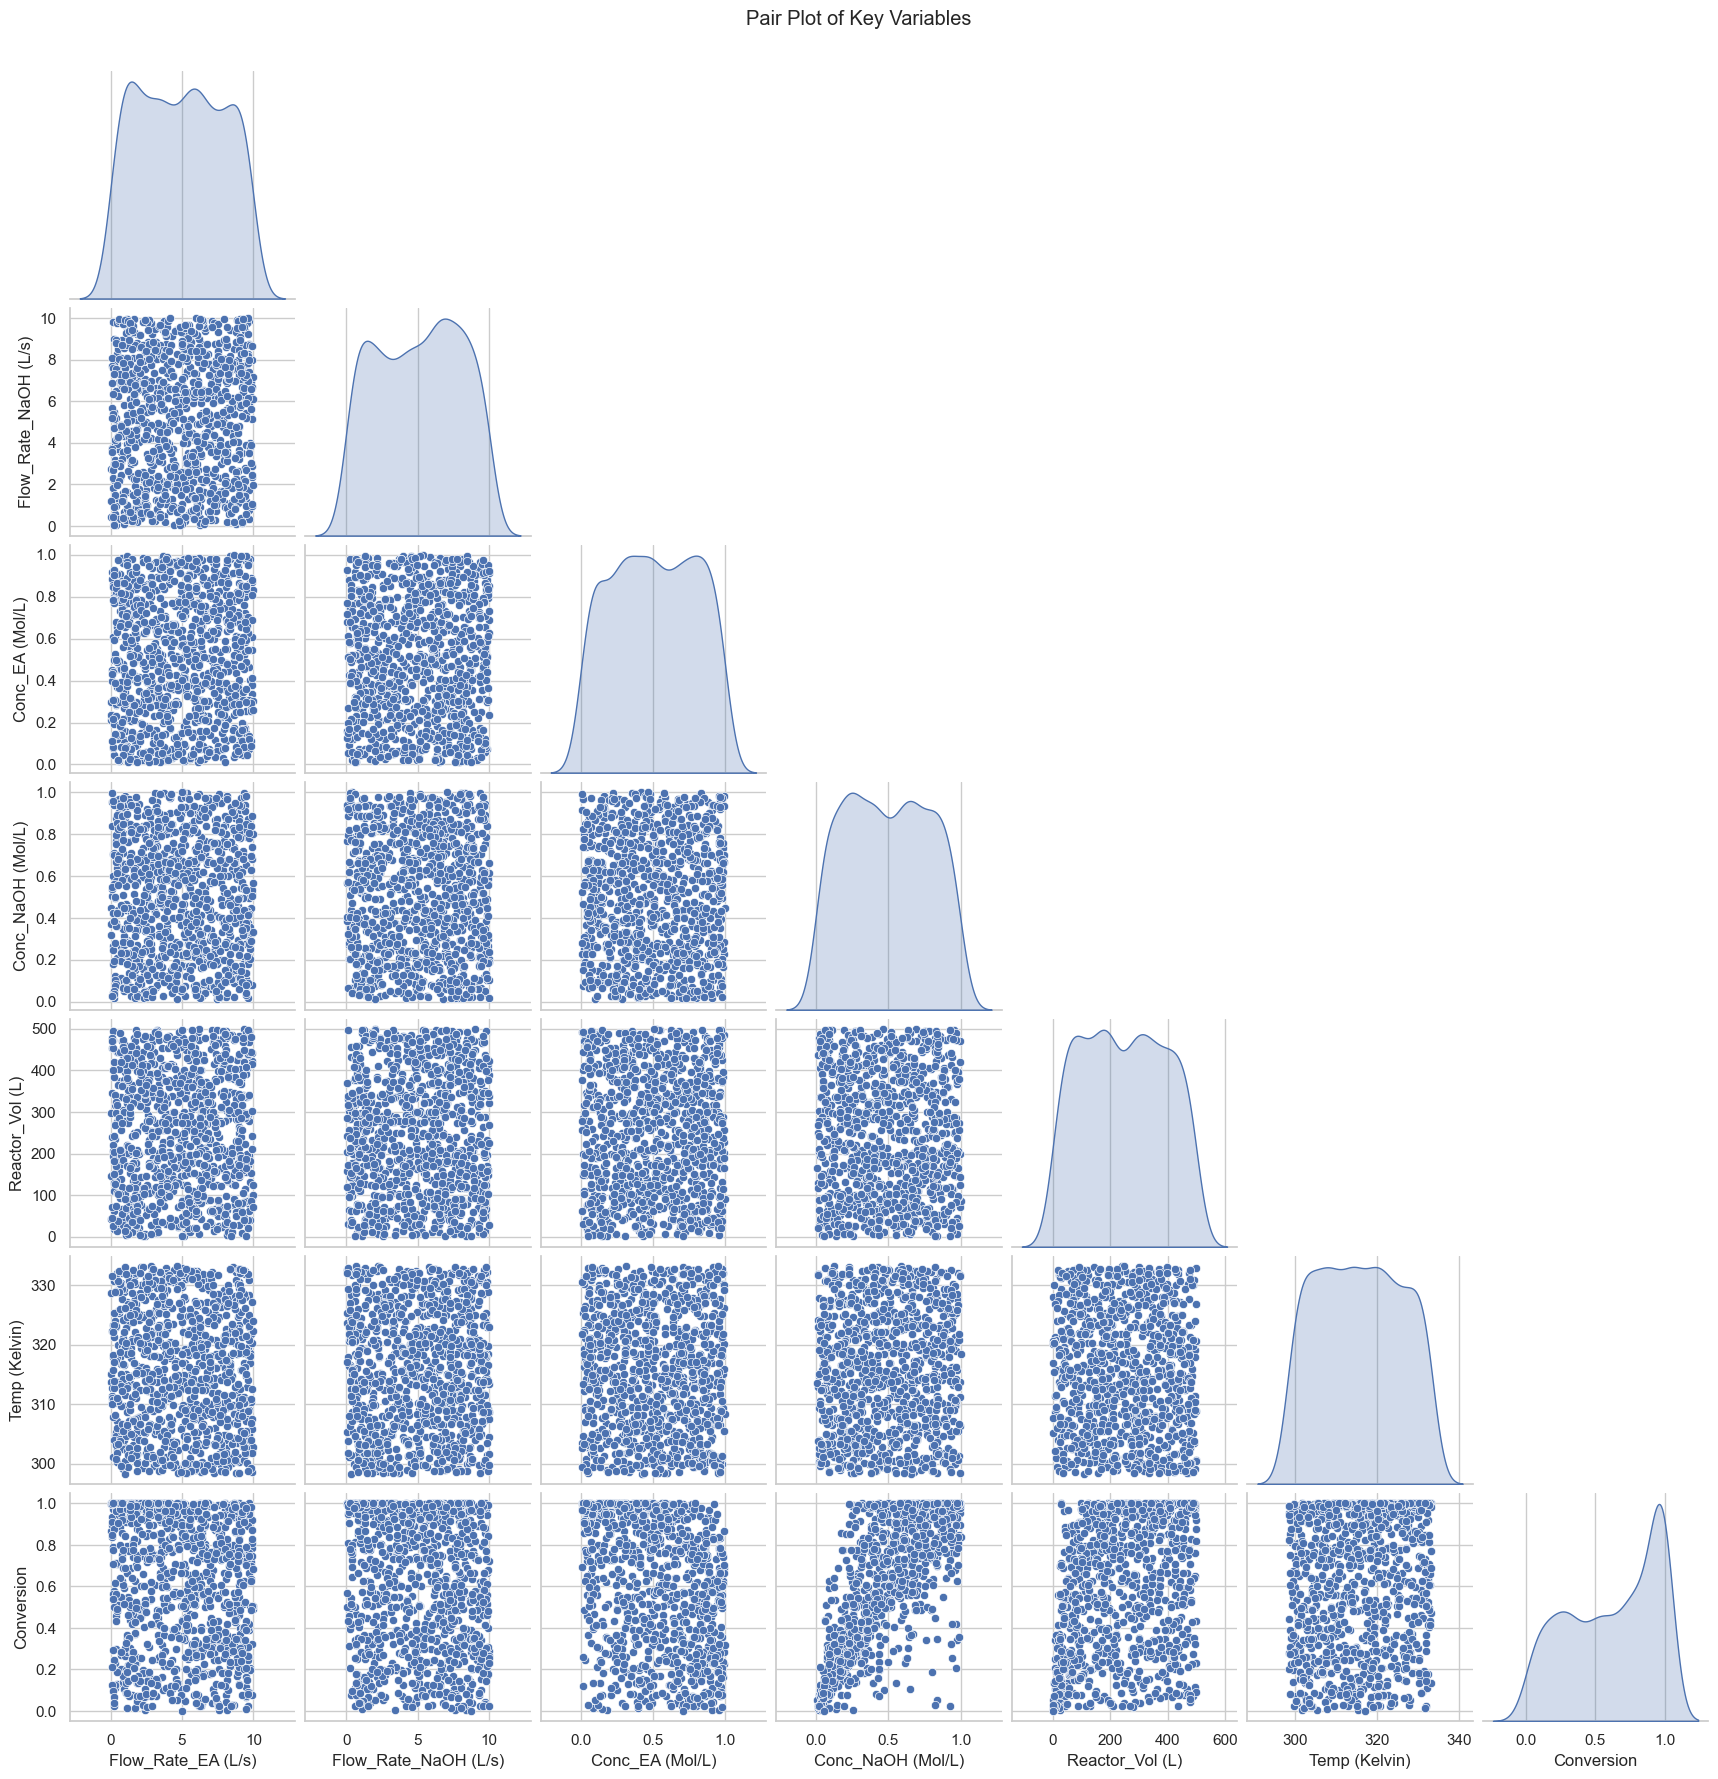

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for seaborn
sns.set(style="whitegrid")

# Scatter Plot: Temperature vs Conversion
plt.figure(figsize=(12, 6))
sns.scatterplot(data=random_data_df, x='Temp (Kelvin)', y='Conversion', hue='Flow_Rate_EA (L/s)', palette='viridis')
plt.title('Temperature vs Conversion with Flow Rate of Ethyl Acetate')
plt.xlabel('Temperature (Kelvin)')
plt.ylabel('Conversion')
plt.legend(title='Flow Rate EA (L/s)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Heatmap: Correlation Matrix
plt.figure(figsize=(10, 8))
correlation_matrix = random_data_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Pair Plot: Explore variable interactions
sns.pairplot(random_data_df[['Flow_Rate_EA (L/s)', 'Flow_Rate_NaOH (L/s)', 'Conc_EA (Mol/L)', 
                             'Conc_NaOH (Mol/L)', 'Reactor_Vol (L)', 'Temp (Kelvin)', 'Conversion']],
             diag_kind='kde', corner=True)
plt.suptitle('Pair Plot of Key Variables', y=1.02)
plt.show()

#### **Data splitting**

In [8]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = random_data_df[['Flow_Rate_EA (L/s)', 'Flow_Rate_NaOH (L/s)', 'Conc_EA (Mol/L)', 
                    'Conc_NaOH (Mol/L)', 'Reactor_Vol (L)', 'Temp (Kelvin)']]
y = random_data_df['Conversion']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### **Model Training**

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 0.00466493348436282
R² Score: 0.9510246614389308


#### **Cross-validation**

In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

# Define a custom scoring function (negative MSE for compatibility with cross_val_score)
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Perform k-fold cross-validation
k = 5  # Number of folds
cv_scores = cross_val_score(model, X_train, y_train, cv=k, scoring=scorer)

# Convert negative MSE to positive
cv_scores = -cv_scores

# Print cross-validation results
print(f"Cross-Validation Scores (MSE): {cv_scores}")
print(f"Mean MSE: {cv_scores.mean():.4f}")
print(f"Standard Deviation of MSE: {cv_scores.std():.4f}")

Cross-Validation Scores (MSE): [0.00426239 0.00523899 0.00472234 0.00493489 0.00556955]
Mean MSE: 0.0049
Standard Deviation of MSE: 0.0004


#### **feature importance analysis**

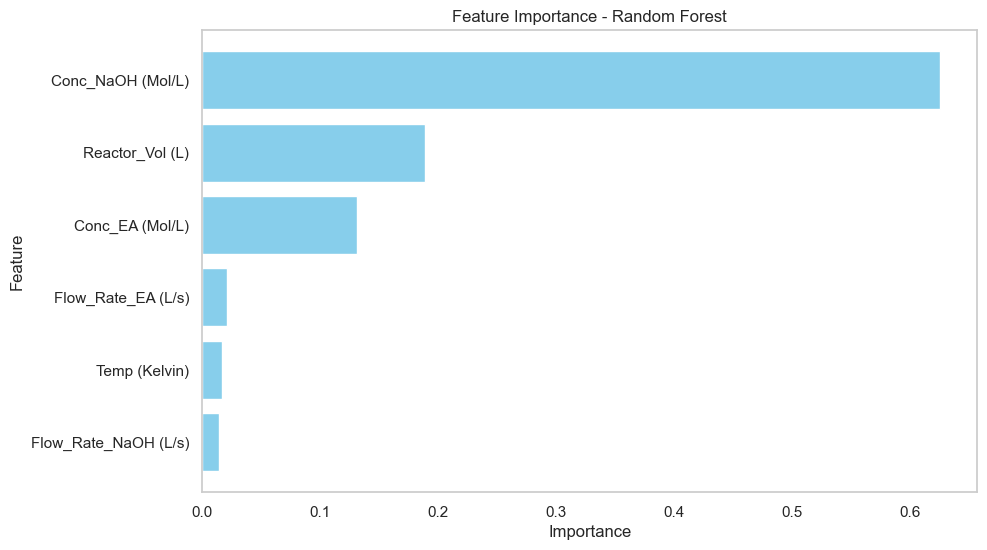

Feature Importance:
                Feature  Importance
3     Conc_NaOH (Mol/L)    0.626062
4       Reactor_Vol (L)    0.189342
2       Conc_EA (Mol/L)    0.131578
0    Flow_Rate_EA (L/s)    0.021407
5         Temp (Kelvin)    0.017166
1  Flow_Rate_NaOH (L/s)    0.014446


In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importance from the model
feature_importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": feature_importances
}).sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df["Feature"], importance_df["Importance"], color="skyblue")
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.grid()
plt.show()

print("Feature Importance:")
print(importance_df)

#### **Residual Analysis**

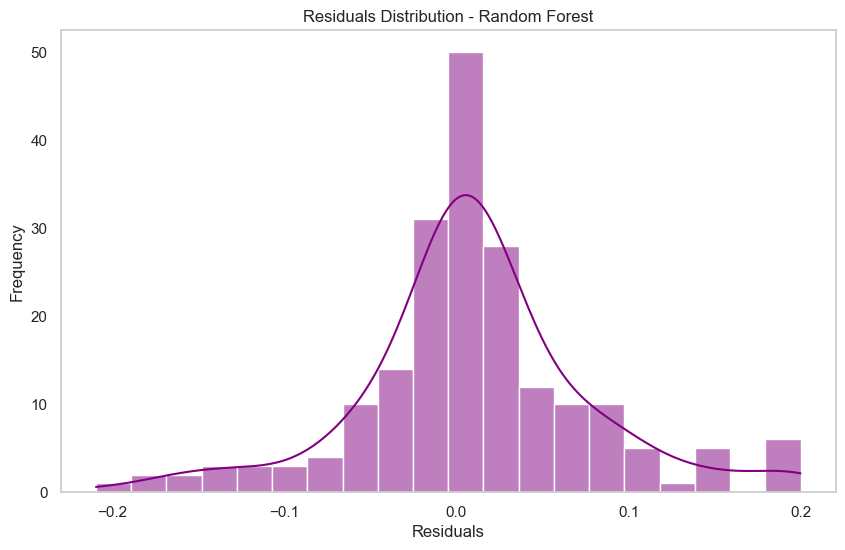

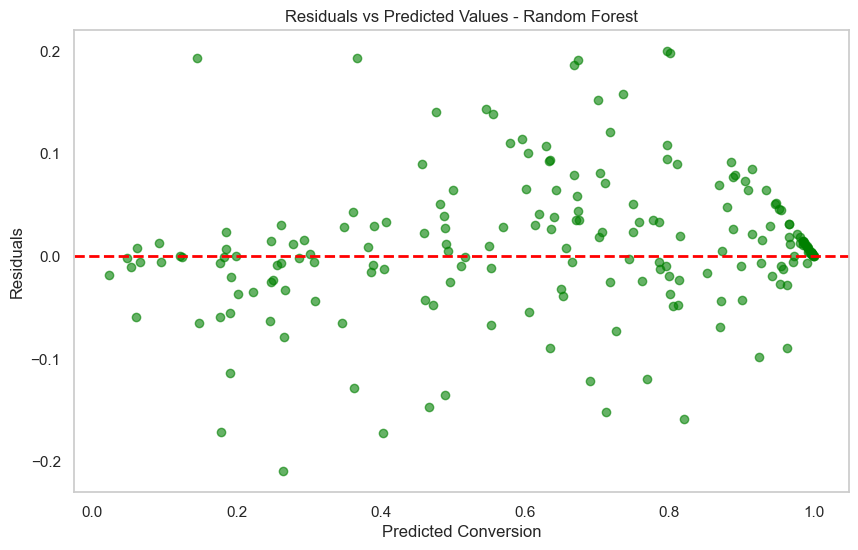

In [12]:
import seaborn as sns

# Calculate residuals
residuals = y_test - y_pred

# Residuals Distribution
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color="purple", bins=20)
plt.title("Residuals Distribution - Random Forest")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid()
plt.show()

# Residuals vs Predicted Values
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.6, color='green')
plt.axhline(0, color='red', linestyle='--', lw=2)
plt.title("Residuals vs Predicted Values - Random Forest")
plt.xlabel("Predicted Conversion")
plt.ylabel("Residuals")
plt.grid()
plt.show()

#### **Model comparison**

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

# Define models to train
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Linear Regression": LinearRegression(),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Support Vector Regressor": SVR()
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store the results
    results[name] = {"MSE": mse, "R²": r2}

# Display the results
for name, metrics in results.items():
    print(f"{name}:")
    print(f"  Mean Squared Error: {metrics['MSE']}")
    print(f"  R² Score: {metrics['R²']}")
    print()

# Select the best model based on R² score
best_model_name = max(results, key=lambda x: results[x]["R²"])
print(f"The best model is {best_model_name} with R² Score: {results[best_model_name]['R²']}")

Random Forest:
  Mean Squared Error: 0.00466493348436282
  R² Score: 0.9510246614389308

Linear Regression:
  Mean Squared Error: 0.02312519503233883
  R² Score: 0.7572174909254372

Gradient Boosting:
  Mean Squared Error: 0.005541542657379922
  R² Score: 0.9418214796190478

Support Vector Regressor:
  Mean Squared Error: 0.08192438846257552
  R² Score: 0.13990742315777815

The best model is Random Forest with R² Score: 0.9510246614389308


C:\Users\prash\AppData\Local\Temp\ipykernel_21152\67839517.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="MSE", y="Model", data=model_comparison, palette="viridis")
C:\Users\prash\AppData\Local\Temp\ipykernel_21152\67839517.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="R²", y="Model", data=model_comparison, palette="viridis")


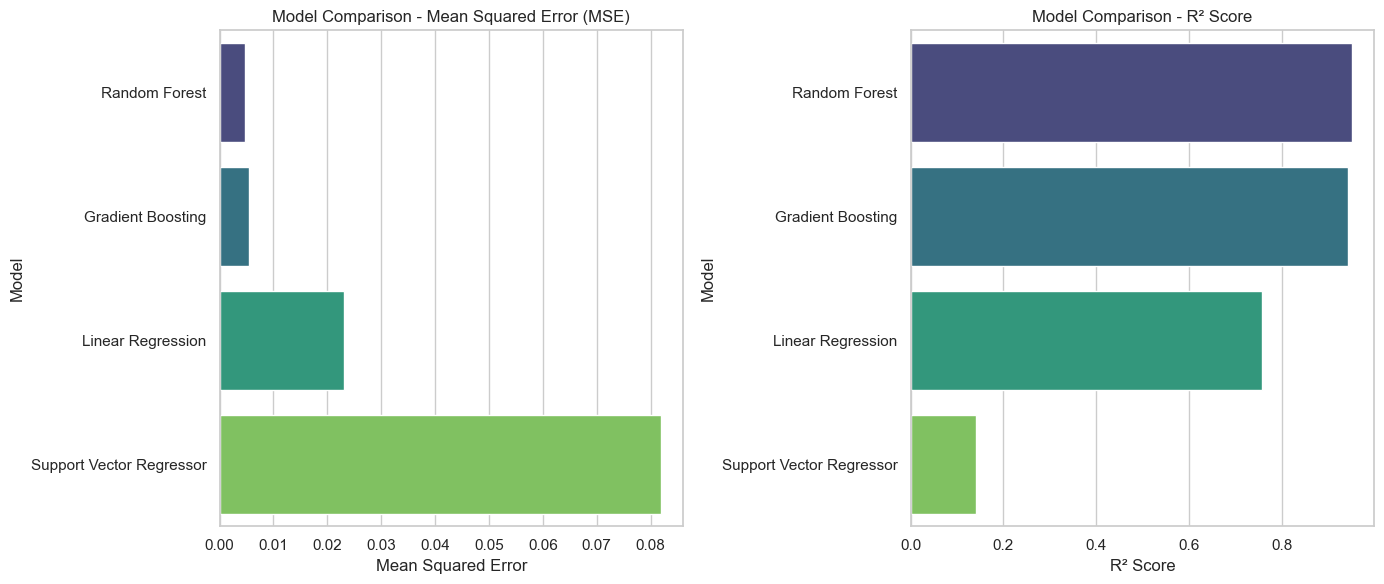

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create a DataFrame to store model performance metrics
model_comparison = pd.DataFrame({
    "Model": list(results.keys()),
    "MSE": [metrics["MSE"] for metrics in results.values()],
    "R²": [metrics["R²"] for metrics in results.values()]
})

# Sort by R² for better visualization
model_comparison = model_comparison.sort_values(by="R²", ascending=False)

# Plot MSE and R² for all models
plt.figure(figsize=(14, 6))

# MSE Bar Plot
plt.subplot(1, 2, 1)
sns.barplot(x="MSE", y="Model", data=model_comparison, palette="viridis")
plt.title("Model Comparison - Mean Squared Error (MSE)")
plt.xlabel("Mean Squared Error")
plt.ylabel("Model")

# R² Bar Plot
plt.subplot(1, 2, 2)
sns.barplot(x="R²", y="Model", data=model_comparison, palette="viridis")
plt.title("Model Comparison - R² Score")
plt.xlabel("R² Score")
plt.ylabel("Model")

plt.tight_layout()
plt.show()

#### **Hyperparameter Tuning**

In [15]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest (example)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best Parameters: {best_params}")
print(f"Best R² Score: {grid_search.best_score_}")

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best R² Score: 0.952970753121248


In [16]:
from bayes_opt import BayesianOptimization
import numpy as np

# Define the objective function for Bayesian Optimization
def objective_function(flow_rate_ea, flow_rate_naoh, conc_ea, conc_naoh, reactor_vol, temp):
    # Prepare the input data for prediction
    input_data = pd.DataFrame({
        'Flow_Rate_EA (L/s)': [flow_rate_ea],
        'Flow_Rate_NaOH (L/s)': [flow_rate_naoh],
        'Conc_EA (Mol/L)': [conc_ea],
        'Conc_NaOH (Mol/L)': [conc_naoh],
        'Reactor_Vol (L)': [reactor_vol],
        'Temp (Kelvin)': [temp]
    })
    
    # Predict the conversion using the trained model
    predicted_conversion = best_model.predict(input_data)
    
    # Return the predicted conversion as the objective to maximize
    return float(predicted_conversion[0])

# Define the bounds for the decision variables
pbounds = {
    'flow_rate_ea': (random_data_df['Flow_Rate_EA (L/s)'].min(), random_data_df['Flow_Rate_EA (L/s)'].max()),
    'flow_rate_naoh': (random_data_df['Flow_Rate_NaOH (L/s)'].min(), random_data_df['Flow_Rate_NaOH (L/s)'].max()),
    'conc_ea': (random_data_df['Conc_EA (Mol/L)'].min(), random_data_df['Conc_EA (Mol/L)'].max()),
    'conc_naoh': (random_data_df['Conc_NaOH (Mol/L)'].min(), random_data_df['Conc_NaOH (Mol/L)'].max()),
    'reactor_vol': (random_data_df['Reactor_Vol (L)'].min(), random_data_df['Reactor_Vol (L)'].max()),
    'temp': (random_data_df['Temp (Kelvin)'].min(), random_data_df['Temp (Kelvin)'].max())
}

# Initialize the Bayesian Optimizer
optimizer = BayesianOptimization(
    f=objective_function,
    pbounds=pbounds,
    random_state=42
)

# Perform the optimization
optimizer.maximize(
    init_points=10,  # Number of random initial points
    n_iter=50        # Number of iterations for optimization
)

# Extract the optimal conditions
optimal_conditions = optimizer.max['params']
optimal_conversion = optimizer.max['target']

# Display the results
print("Optimal Conditions:")
print(f"Flow Rate EA (L/s): {optimal_conditions['flow_rate_ea']:.4f}")
print(f"Flow Rate NaOH (L/s): {optimal_conditions['flow_rate_naoh']:.4f}")
print(f"Concentration EA (Mol/L): {optimal_conditions['conc_ea']:.4f}")
print(f"Concentration NaOH (Mol/L): {optimal_conditions['conc_naoh']:.4f}")
print(f"Reactor Volume (L): {optimal_conditions['reactor_vol']:.4f}")
print(f"Temperature (Kelvin): {optimal_conditions['temp']:.4f}")
print(f"Maximum Predicted Conversion: {optimal_conversion:.4f}")

|   iter    |  target   |  conc_ea  | conc_naoh | flow_r... | flow_r... | reacto... |   temp    |
-------------------------------------------------------------------------------------------------
| 1         | 0.5814    | 0.38      | 0.9508    | 7.331     | 5.996     | 78.27     | 303.8     |
| 2         | 0.2836    | 0.06739   | 0.8672    | 6.028     | 7.086     | 10.77     | 332.1     |
| 3         | 0.236     | 0.8323    | 0.2206    | 1.856     | 1.86      | 152.1     | 316.6     |
| 4         | 0.4752    | 0.4367    | 0.2986    | 6.135     | 1.423     | 146.1     | 311.1     |
| 5         | 0.9401    | 0.4605    | 0.7871    | 2.034     | 5.155     | 295.8     | 300.0     |
| 6         | 0.2803    | 0.6102    | 0.1793    | 0.6946    | 9.485     | 481.7     | 326.5     |
| 7         | 0.1843    | 0.3109    | 0.1072    | 6.855     | 4.418     | 61.33     | 315.6     |
| 8         | 0.9385    | 0.04398   | 0.9099    | 2.622     | 6.633     | 155.9     | 316.4     |
| 9         | 0.3391

| 19        | 0.7647    | 0.3294    | 0.3544    | 3.582     | 3.829     | 318.6     | 327.1     |
| 20        | 0.9978    | 0.1739    | 0.6117    | 4.38      | 0.7547    | 312.9     | 325.8     |
| 21        | 0.9733    | 0.5815    | 0.8357    | 6.135     | 3.828     | 313.8     | 326.3     |
| 22        | 0.5431    | 0.3739    | 0.2079    | 5.802     | 2.285     | 308.8     | 326.3     |
| 23        | 0.2123    | 0.7544    | 0.1806    | 3.198     | 9.145     | 157.8     | 314.0     |
| 24        | 0.6372    | 0.2616    | 0.2164    | 5.286     | 1.997     | 315.1     | 326.6     |
| 25        | 0.8938    | 0.7562    | 0.7127    | 8.232     | 2.58      | 313.1     | 325.0     |
| 26        | 0.8989    | 0.6833    | 0.6841    | 5.698     | 0.6454    | 318.6     | 330.5     |
| 27        | 0.9983    | 0.08535   | 0.6523    | 5.861     | 1.172     | 312.5     | 323.5     |
| 28        | 0.5383    | 0.7947    | 0.4451    | 4.444     | 3.868     | 312.2     | 322.2     |
| 29        | 0.9325

In [17]:
import pickle

# Save the trained model to a file
with open('pfr_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

print("Model saved as 'pfr_model.pkl'")

Model saved as 'pfr_model.pkl'
